In [13]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/Users/brandonmanley/Desktop/PhD/oam_pheno/dijet_dsa')
import dsa_mc.dijet as dijet
import random
from IPython.display import display, Math

# setup plotting
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16
plt.rcParams["legend.fontsize"] = 12
plt.rcParams["axes.labelsize"] = 16  
plt.rcParams["xtick.labelsize"] = 14  
plt.rcParams["ytick.labelsize"] = 14
plt.rcParams["axes.titlesize"] = 18  
plt.rcParams["text.usetex"] = True
plt.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}"
%config InlineBackend.figure_format = 'retina'

In [14]:
dj = dijet.DIJET(replica=3, constrained_moments=True, fit_type='pp')

roots = 95

space = {
    'y' : [0.05, 0.95],
    'z' : [0.2, 0.5],
    'Q2' : [16, 100],
    't' : [0.01, 0.04],
    'phi_Dp': [0, 2*np.pi],
    'phi_kp': [0, 2*np.pi]
}

data = {}
methods = ['riemann', 'gauss-legendre', 'mc']
weights = ['1', 'cos(phi_Dp)', 'cos(phi_Dp)cos(phi_kp)', 'sin(phi_Dp)sin(phi_kp)']
for m in methods:
    data[m] = {}
    for w in weights: data[m][w] = []

points = {'riemann': 3, 'gauss-legendre': 4, 'mc': 50}
pT_values = np.linspace(1,10,10)
for m in methods:
    den = dj.get_integrated_xsec(pT_values, roots**2, space, points=points[m], kind='den', method=m)
    for w in weights:
        print(m,w)
        num = dj.get_integrated_xsec(pT_values, roots**2, space, points=points[m], kind='num', weight=w, method=m)
        data[m][w] = num/den

np.save('predictions/integral_testing.npy', data, allow_pickle=True)


--> !!! Using constrained moment parameters!
--> loaded unpol. amp. data from /dipoles/narr_ymin4.61_ymax14.91_AAMS09.dat
--> loaded pol. amp. data from /dipoles/d05-rc/
--> loaded params from /dipoles/replica_params_pp_2.csv
--> loaded random moment params from /dipoles/moment_params_pp.csv
--> loaded replica 3
riemann 1
riemann cos(phi_Dp)
riemann cos(phi_Dp)cos(phi_kp)
riemann sin(phi_Dp)sin(phi_kp)
gauss-legendre 1
gauss-legendre cos(phi_Dp)
gauss-legendre cos(phi_Dp)cos(phi_kp)
gauss-legendre sin(phi_Dp)sin(phi_kp)
mc 1
mc cos(phi_Dp)
mc cos(phi_Dp)cos(phi_kp)
mc sin(phi_Dp)sin(phi_kp)


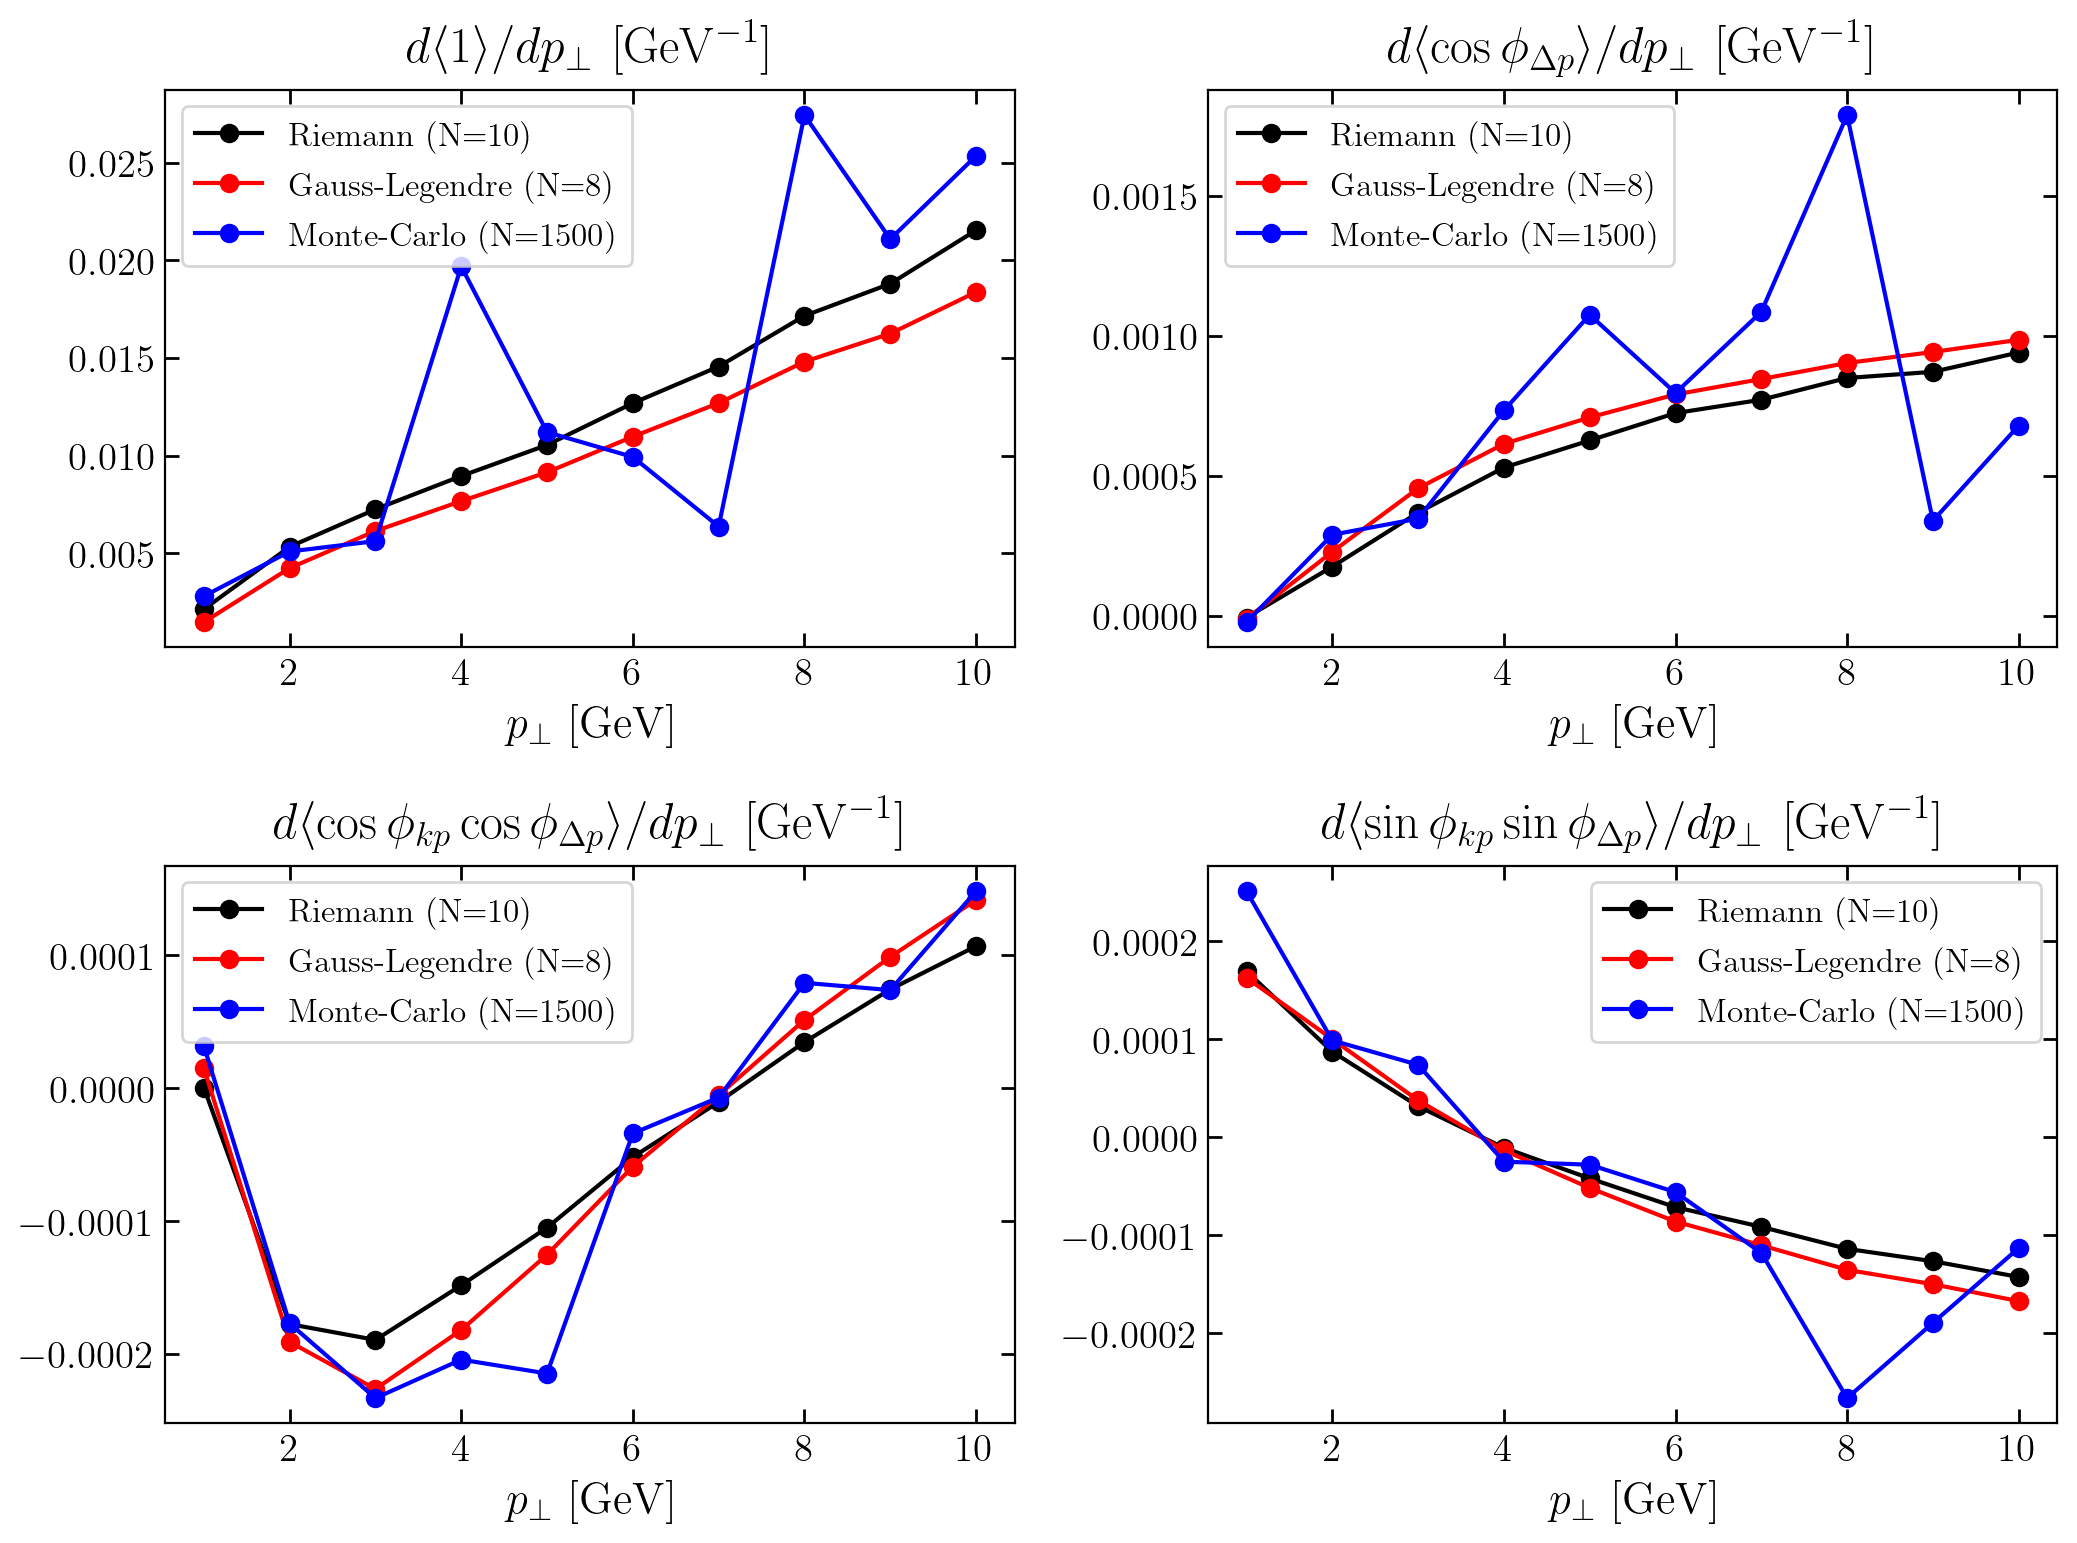

In [15]:
data = np.load('predictions/integral_testing.npy', allow_pickle=True).item()
pT_values = np.linspace(1,10,10) # check to make sure same as above!!

asp_ratio = 4/3
psize = 4
nrows, ncols = 2,2
fig, ax = plt.subplots(nrows, ncols, figsize=(asp_ratio*psize*nrows, psize*ncols))

colors = ['black', 'red', 'blue']
labels = ['Riemann (N=10)', 'Gauss-Legendre (N=8)', 'Monte-Carlo (N=1500)']
axs = [(irow,icol) for irow in range(nrows) for icol in range(ncols)]

for i, meth in enumerate(methods):
    for j, weight in enumerate(data[meth]):
        ax[axs[j]].plot(pT_values, data[meth][weight], color=colors[i], label=labels[i], marker='o')

for iax in axs:
    ax[iax].tick_params(axis="both", direction="in", length=5, width=1, which='both', right=True, top=True)
    ax[iax].set_xlabel(r'$p_{\perp}$ [GeV]')
    ax[iax].legend()
    # ax[iax].semilogy()

ax[0,0].set_title(r'$d \langle 1 \rangle /d p_\perp \,\,[\mathrm{GeV}^{-1}]$', pad=10)
ax[0,1].set_title(r'$d \langle \cos \phi_{\Delta p}  \rangle /d p_\perp \,\,[\mathrm{GeV}^{-1}]$', pad=10)
ax[1,0].set_title(r'$d \langle \cos \phi_{k p}  \cos \phi_{\Delta p}  \rangle /d p_\perp \,\,[\mathrm{GeV}^{-1}]$', pad=10)
ax[1,1].set_title(r'$d \langle  \sin \phi_{k p}  \sin \phi_{\Delta p}  \rangle /d p_\perp \,\,[\mathrm{GeV}^{-1}]$', pad=10)

plt.tight_layout()
plt.show()

# fig.savefig('plots/integrals_corrs.pdf', dpi=700)


In [18]:
dj = dijet.DIJET(replica=4, constrained_moments=True, fit_type='pp')

roots = 95

space = {
    'y' : [0.05, 0.95],
    'z' : [0.2, 0.5],
    'Q2' : [16, 100],
    't' : [0.01, 0.04],
    'phi_Dp': [0, 2*np.pi],
    'phi_kp': [0, 2*np.pi]
}

data = {}
methods = ['riemann', 'gauss-legendre', 'mc']
for m in methods:
    data[m] = {}
    for w in ['den', 'num']:
        data[m][w] = []

points = np.arange(3, 10)
pT_values = [3]
for pts in points:
    print(pts)
    for m in methods:
        if m=='mc': pts*=100
        for f in ['num', 'den']:
            v = dj.get_integrated_xsec(pT_values, roots**2, space, points=pts, kind=f, method=m)[0]
            data[m][f].append(v)

    np.save('predictions/integral_testing_points.npy', data, allow_pickle=True)


--> !!! Using constrained moment parameters!
--> loaded unpol. amp. data from /dipoles/narr_ymin4.61_ymax14.91_AAMS09.dat
--> loaded pol. amp. data from /dipoles/d05-rc/
--> loaded params from /dipoles/replica_params_pp_2.csv
--> loaded random moment params from /dipoles/moment_params_pp.csv
--> loaded replica 4
3
4
5
6
7
8
9


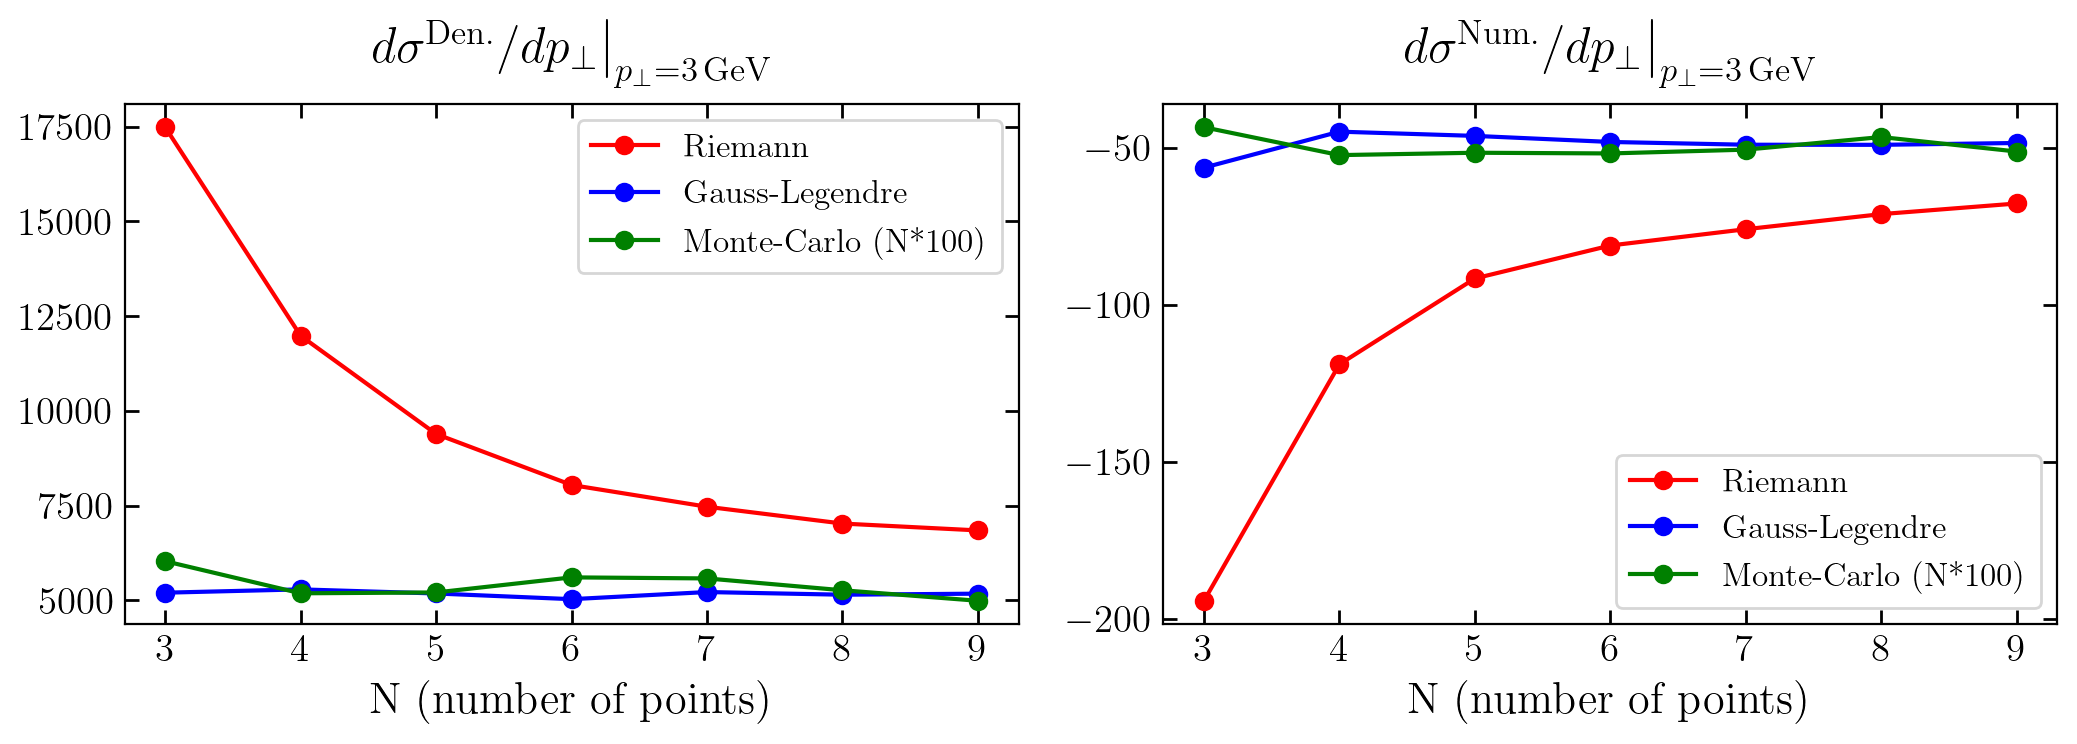

In [19]:
conv_data = np.load('predictions/integral_testing_points.npy', allow_pickle=True).item()

asp_ratio = 4/3
psize = 4

nrows, ncols = 1,2
fig, axs = plt.subplots(nrows, ncols, figsize=(asp_ratio*psize*ncols, psize*nrows))

points = np.arange(3, len(conv_data['riemann']['den']) + 3)

colors = ['r', 'b', 'g']
labels = ['Riemann', 'Gauss-Legendre', 'Monte-Carlo (N*100)']

for iax, weight in enumerate(['den', 'num']):
    for iapp, approx in enumerate(['riemann', 'gauss-legendre', 'mc']):
        axs[iax].plot(points, conv_data[approx][weight], label=labels[iapp], color=colors[iapp], marker='o')

    axs[iax].legend()
    # axs[iax].semilogy()
    axs[iax].tick_params(axis="both", direction="in", length=5, width=1, which='both', right=True, top=True)
    axs[iax].set_xlabel('N (number of points)')
    axs[iax].tick_params(axis="both", direction="in", length=5, width=1, which='both', right=True, top=True)

axs[0].set_title(r'$ d \sigma^{\mathrm{Den.}} / d p_\perp \big |_{p_\perp = 3\, \mathrm{GeV} } $', pad=15)
axs[1].set_title(r'$ d \sigma^{\mathrm{Num.}} / d p_\perp \big |_{p_\perp = 3\, \mathrm{GeV} } $', pad=15)

plt.tight_layout()
plt.show()


# fig.savefig('plots/integrals_points.pdf', dpi=700)